# Exam 2: Linguistic Preprocessing, Visualizations, and Machine Learning 

There are 2 sections to this exam. Each of the sections are independent of the other. Almost all of the questions in Sections A and B are self-contained, i.e. not being able to do one question (or its parts) will not stop you from working on the others.

**Part A**
- Q1: Retrieve contents of files in directory (3 points)
- Q2: Load a csv file into pandas and filter its rows (2 points)
- Q3: Extract information from text - part I (2 points)
- Q4: Extract information from text - part II (3 points)
- Q5: Segment and tokenize text; compute statistics (4 points)

**Part B**
- Q6: Obtain features for clustering (2 points)
- Q7: Train a clustering model (1 point)
- Q8: Vary n_clusters and select n_clusters based on centroid distances/silhouette scores (7 points)
- Q9: Apply KMeans model on a different dataset (6 points)

**IMPORTANT**: Make sure that your code can be executed. **No points** will be awarded for solutions to questions/parts whose cell cannot be executed successfully (i.e. throws an error). 

In [150]:
#Importation of libraries
import os
import pandas as pd
import re
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import cosine_similarity



## Section A: Linguistic Processing

### Q1: Retrieve contents of files in directory (3 points)
Write a single function that will give the names of the ```.txt``` files in the ```data``` folder. Your function should do the following:
1. return (sorted in ascending order) the names of the ```.txt``` files that are found in the folders. (2 points)
2. and return **only** the set of files whose starting alphabet (e.g. "A" in the case of "Arrondissement_of_Neufchâteau_Vosges.txt") is **shared by two or less .txt files in the folder**. (1 point)

__Expected output__: ['Arrondissement_of_Neufchâteau_Vosges.txt',
 'Arrondissement_of_Épinal.txt',
 'Basilica_of_Saint-Nicolas_Saint-Nicolas-de-Port.txt',
 'Batilly_Meurthe-et-Moselle.txt',
 'Essonne.txt',
 'Grand_Est.txt',
 'House_of_Lorraine.txt',
 'Jarville-la-Malgrange.txt',
 'Laxou.txt',
 'Malzéville.txt',
 'Maxéville.txt',
 'Nancy_France.txt',
 'Neuves-Maisons.txt',
 'Place_Stanislas.txt',
 'Pont-à-Mousson.txt',
 'Remoncourt_Meurthe-et-Moselle.txt',
 'Romain_Meurthe-et-Moselle.txt',
 'Saint-Firmin_Meurthe-et-Moselle.txt',
 'Tomblaine.txt',
 'Vandœuvre-lès-Nancy.txt',
 'Villers-lès-Nancy.txt']

In [151]:
def get_names(dir):
    '''
    dir = directory path. In order to ensure that the format is right, use absolute path. The use of 'r' at the beginning of the
    string is recommended to avoid reading errors.
    '''
    name_list = []
    file_names = os.listdir(dir)

    for name in file_names:
        base_name = os.path.basename(name)
        name_list.append(base_name) 
    
    name_list.sort()
    
    return name_list

In [152]:
result = get_names(r'C:\Users\belen\Desktop\Université de Lorraine\Second semester\Data_science_P2\Exam_2\arche_exam2\data')
print(result)

['Arrondissement_of_Neufch├óteau_Vosges.txt', 'Arrondissement_of_├ëpinal.txt', 'Basilica_of_Saint-Nicolas_Saint-Nicolas-de-Port.txt', 'Batilly_Meurthe-et-Moselle.txt', 'Belfries_of_Belgium_and_France.txt', 'Bettainvillers.txt', 'Essonne.txt', 'Grand_Est.txt', 'House_of_Lorraine.txt', 'Jarville-la-Malgrange.txt', 'Laxou.txt', 'Malz├®ville.txt', 'Max├®ville.txt', 'Meurthe-et-Moselle.txt', 'Nancy_France.txt', 'Neuves-Maisons.txt', 'Place_Stanislas.txt', 'Pont-├á-Mousson.txt', 'Remoncourt_Meurthe-et-Moselle.txt', 'Romain_Meurthe-et-Moselle.txt', 'Saint-Firmin_Meurthe-et-Moselle.txt', 'Tomblaine.txt', 'Vand┼ôuvre-l├¿s-Nancy.txt', 'Villers-l├¿s-Nancy.txt', 'q2_data.csv', 'q5_data.csv', 'q6_data.csv', 'q9_data.csv']


### Q2: Load a csv file into pandas and filter its rows (2 points)
Write code that will do the following: 
1. Load the file named ```q2_data.csv``` in the ```data``` folder as a dataframe in pandas. (1 point)
2. Filter the dataframe to keep only rows whose ```content``` column contains French pronounciation information (e.g. "French pronunciation: [batiji]") (1 point)

In [153]:
data_q2 = pd.read_csv(r'C:\Users\belen\Desktop\Université de Lorraine\Second semester\Data_science_P2\Exam_2\arche_exam2\data\q2_data.csv')
data_q2.head()

,title,content
0,Arrondissement_of_Neufchâteau_Vosges,The arrondissement of Neufchâteau is an arrond...
1,Arrondissement_of_Épinal,The arrondissement of Épinal is an arrondissem...
2,Basilica_of_Saint-Nicolas_Saint-Nicolas-de-Port,The Basilica of Saint Nicholas (French: Basili...
3,Batilly_Meurthe-et-Moselle,Batilly (French pronunciation: [batiji] ) is a...
4,Belfries_of_Belgium_and_France,The Belfries of Belgium and France are a group...


In [154]:
df_filtered = data_q2[data_q2['content'].str.contains('French pronunciation: ')]
df_filtered.head()

,title,content
3,Batilly_Meurthe-et-Moselle,Batilly (French pronunciation: [batiji] ) is a...
6,Malzéville,Malzéville (French pronunciation: [malzevil]) ...
7,Maxéville,Maxéville (French pronunciation: [maksevil] or...
8,Meurthe-et-Moselle,Meurthe-et-Moselle (French pronunciation: [mœʁ...
10,Neuves-Maisons,Neuves-Maisons (French pronunciation: [nœv mɛz...


### Q3: Extract information from text - part I (2 points)
Write code involving regular expressions that will check whether a given line contains two words side-by-side that start with an 'm' followed by a 'p' (case sensitive). For e.g.: 

    'X  lost  the  match  point  to  Y  .' 
will be caught, but 

    'This game is for Match Points.' 
will not be caught. 

_Ignore abbreviations and orthographically wrong text (e.g. 'm.', 'mATCH', 'pOiNt' etc)_

In [156]:
pattern = r'\b[mM]\w*\b.*\b[pP]\w*\b'

test_text = 'This is a random test for match Points test test'

re.findall(pattern, test_text)

['match Points']

### Q4: Extract information from text - part II (3 points)
Write code that will extract from any given lines, all the text in brackets that are composed of only abbreviations and fully capitalised (e.g. 'ENSIC' but not 'Université Nancy 2'). Example line: 

    '''Nancy has a large number of institutions of higher learning:\n\nUniversity of Lorraine which merges:\nHenri Poincaré University (Université Henri Poincaré, UHP, also known as Nancy 1)\nNancy 2 University (Université Nancy 2)\nEuropean University Centre\nNational Polytechnic Institute of Lorraine (Institut National Polytechnique de Lorraine or INPL)\nÉcole nationale supérieure des Mines de Nancy\nÉcole nationale supérieure des industries chimiques (ENSIC)\nÉcole nationale supérieure d\'agronomie et des industries alimentaires (ENSAIA)\nÉcole européenne d\'ingénieurs en génie des matériaux (EEIGM)\nÉcole nationale supérieure d\'électricité et de mécanique (ENSEM)\nÉcole nationale supérieure de géologie (ENSG)\nÉcole nationale supérieure en génie des systèmes et de l\'innovation (ENSGSI)\nTelecom Nancy (ex-ESIAL)\nÉcole Polytechnique de l\'Université de Lorraine (Polytech Nancy)\nÉcole des Beaux-Arts de Nancy\nÉcole nationale supérieure d\'art de Nancy\nSchool of architecture of Nancy (ENSA)\nÉcole pour l\'informatique et les nouvelles technologies (EPITECH)\nICN Graduate Business School (Institut Commercial de Nancy)\nSciences Po Paris (French-German Undergraduate Campus)\nCentre de Nancy-AgroParisTech\nÉcole Supérieure Robert de Sorbon\nFrench National School of Forestry, est. 1824, in Nancy.'''

__Expected output__: ['ENSIC', 'ENSAIA', 'EEIGM', 'ENSEM', 'ENSG', 'ENSGSI', 'ENSA', 'EPITECH']

In [165]:
pattern_2 = r'\(\b[A-Z]{2,}\b\)'

test_text_2 = 'Nancy has a large number of institutions of higher learning:\n\nUniversity of Lorraine which merges:\nHenri Poincaré University (Université Henri Poincaré, UHP, also known as Nancy 1)\nNancy 2 University (Université Nancy 2)\nEuropean University Centre\nNational Polytechnic Institute of Lorraine (Institut National Polytechnique de Lorraine or INPL)\nÉcole nationale supérieure des Mines de Nancy\nÉcole nationale supérieure des industries chimiques (ENSIC)\nÉcole nationale supérieure d\'agronomie et des industries alimentaires (ENSAIA)\nÉcole européenne d\'ingénieurs en génie des matériaux (EEIGM)\nÉcole nationale supérieure d\'électricité et de mécanique (ENSEM)\nÉcole nationale supérieure de géologie (ENSG)\nÉcole nationale supérieure en génie des systèmes et de l\'innovation (ENSGSI)\nTelecom Nancy (ex-ESIAL)\nÉcole Polytechnique de l\'Université de Lorraine (Polytech Nancy)\nÉcole des Beaux-Arts de Nancy\nÉcole nationale supérieure d\'art de Nancy\nSchool of architecture of Nancy (ENSA)\nÉcole pour l\'informatique et les nouvelles technologies (EPITECH)\nICN Graduate Business School (Institut Commercial de Nancy)\nSciences Po Paris (French-German Undergraduate Campus)\nCentre de Nancy-AgroParisTech\nÉcole Supérieure Robert de Sorbon\nFrench National School of Forestry, est. 1824, in Nancy.'

re.findall(pattern_2,test_text_2)

['(ENSIC)',
 '(ENSAIA)',
 '(EEIGM)',
 '(ENSEM)',
 '(ENSG)',
 '(ENSGSI)',
 '(ENSA)',
 '(EPITECH)']

### Q5: Segment and tokenize text; compute statistics (4 points)
Write code that will do the following:

1. Load the file named ```q5_data.csv``` in the ```data``` folder as a dataframe in pandas. (1 point)
2. Use spacy to segment each of the texts in the ```content``` column. Compute the number of sentences in each document and save these results under a new column called ```num_sents``` in the dataframe. (1 point)
3. Similarly, for each document, compute the average number of named entities for each of its sentences. i.e. if a text has 3 sentences, check the number of named entities in each sentence and compute the mean. Save these results under a new column called ```avg_num_ne_per_sent```. (1 point)
4. Compute the correlation between num_sents and avg_num_words_per_sent. (1 point)

In [158]:
# 1: Load Data
data_q5 = pd.read_csv('data/q5_data.csv')

# 2: Segmentation of sentences
nlp = spacy.load('en_core_web_sm')

def sent_process(df, column_name):
    # Process each part with spacy first. So we have tokens. Used to additional columns just to maintain all info
    df['doc'] = df[column_name].apply(nlp)
    df['sent_token'] = df['doc'].apply(lambda doc: [sent for sent in doc.sents])
    # Now count each occurrences in the desired column
    df['num_sents'] = df['sent_token'].apply(len)
    return df

data_q5 = sent_process(data_q5, 'content')

# 3: Named Entity Processing
def ent_process(df):
    # Calculate average number of named entities per sentence
    def avg_ents_per_sent(sent_token):
        if not sent_token:
            return 0
        num_entities = [len(sent.ents) for sent in sent_token]
        return sum(num_entities) / len(num_entities)
    
    df['avg_num_ne_per_sent'] = df['sent_token'].apply(avg_ents_per_sent)
    return df

data_q5 = ent_process(data_q5)

# 4: Compute correlation
correlation = data_q5['num_sents'].corr(data_q5['avg_num_ne_per_sent'])

print(f"Correlation between num_sents and avg_num_ne_per_sent: {correlation}")
data_q5.head()


Correlation between num_sents and avg_num_ne_per_sent: 0.11326733021496176


,title,content,doc,sent_token,num_sents,avg_num_ne_per_sent
0,Arrondissement_of_Neufchâteau_Vosges,The arrondissement of Neufchâteau is an arrond...,"(The, arrondissement, of, Neufchâteau, is, an,...","[(The, arrondissement, of, Neufchâteau, is, an...",9,3.000000
1,Arrondissement_of_Épinal,The arrondissement of Épinal is an arrondissem...,"(The, arrondissement, of, Épinal, is, an, arro...","[(The, arrondissement, of, Épinal, is, an, arr...",8,3.750000
2,Basilica_of_Saint-Nicolas_Saint-Nicolas-de-Port,The Basilica of Saint Nicholas (French: Basili...,"(The, Basilica, of, Saint, Nicholas, (, French...","[(The, Basilica, of, Saint, Nicholas, (, Frenc...",6,3.833333
3,Batilly_Meurthe-et-Moselle,Batilly (French pronunciation: [batiji] ) is a...,"(Batilly, (, French, pronunciation, :, [, bati...","[(Batilly, (, French, pronunciation, :, [, bat...",5,1.400000
4,Belfries_of_Belgium_and_France,The Belfries of Belgium and France are a group...,"(The, Belfries, of, Belgium, and, France, are,...","[(The, Belfries, of, Belgium, and, France, are...",15,4.066667


## Section B: Machine Learning and Visualizations

### Q6: Obtain features for clustering (2 points)
Write code that does the following: 
1. Load the file named ```q5_data.csv``` in the ```data``` folder as a dataframe in pandas. This will be the corpus that you will use to train a clustering model. (1 point)
2. Use TfidfVectorizer on the corpus to extract features for each document. i.e. each document in the corpus is represented as a vector. Do this on the entire corpus. You can use the default settings for TfidfVectorizer, but set **max_features = 200, stop_words = 'english' and lowercase = True**. The output of applying the TfidfVectorizer object should be saved to the variable ```X```. (1 point)

In [159]:
df_clust = pd.read_csv(fr'C:\Users\belen\Desktop\Université de Lorraine\Second semester\Data_science_P2\Exam_2\arche_exam2\data\q6_data.csv')
df_clust.head()

,title,content
0,Rive Gauche,The Rive Gauche (French pronunciation: [ʁiv ɡo...
1,List of intercommunalities of the Seine-Saint-...,"Saint-Denis (, French: [sɛ̃d(ə)ni] ) is a comm..."
2,Georges-Eugène Haussmann,"Georges-Eugène Haussmann, commonly known as Ba..."
3,Cantons of the Hauts-de-Seine department,The following is a list of the 23 cantons of t...
4,Arrondissements of the Tarn department,The 2 arrondissements of the Tarn department a...


In [160]:
vectorizer = TfidfVectorizer(max_features = 200, stop_words = 'english', lowercase=True)

X = vectorizer.fit_transform(df_clust['content'])

print(X.shape)

features = vectorizer.get_feature_names_out()
print(features)

(49, 200)
['000' '10' '11' '12' '13' '19' '1980s' '1990s' '1999' '2003' '2006'
 '2007' '2008' '2016' '2018' '2020' 'access' 'album' 'american' 'ancient'
 'archive' 'area' 'arrondissement' 'arrondissements' 'artists' 'awards'
 'band' 'bangalter' 'based' 'beats' 'began' 'best' 'black' 'book' 'books'
 'boulevard' 'built' 'bus' 'called' 'century' 'check' 'chicago' 'city'
 'club' 'clubs' 'commune' 'communes' 'created' 'culture' 'daft' 'dance'
 'denis' 'department' 'des' 'developed' 'different' 'digit' 'digital'
 'digits' 'disco' 'dj' 'djs' 'drum' 'du' 'duo' 'early' 'electronic'
 'element' 'elements' 'english' 'et' 'example' 'external' 'film' 'france'
 'french' 'funk' 'genre' 'greek' 'group' 'haussmann' 'hip' 'history' 'hit'
 'hop' 'house' 'hrundi' 'iii' 'include' 'including' 'international' 'isbn'
 'isbns' 'january' 'known' 'la' 'language' 'large' 'late' 'later' 'le'
 'library' 'like' 'line' 'lines' 'links' 'list' 'live' 'located' 'long'
 'love' 'make' 'making' 'march' 'metro' 'million' 'mi

### Q7: Train a clustering model (1 point)
Use the KMeans algorithm and train a model on ```X``` to predict the cluster for each document. Ensure to set **n_clusters = 2, n_init = 100 and random_state = 10** (You can use the rest of the default settings for the KMeans algorithm). Assign this KMeans model to the variable ```kmeans``` (we will reuse this for Q9 later).

In [161]:
kmeans = KMeans(n_clusters=2, n_init=100, random_state=10)
kmeans.fit(X)

KMeans(n_clusters=2, n_init=100, random_state=10)

### Q8: Vary n_clusters and select n_clusters based on centroid distances/silhouette scores (7 points)
Write code that will do the following:
1. train KMeans models with different values of n_cluster, from 2 to 5 inclusive. As before, set **n_init = 100 and random_state = 10** (1 point)
2. compute the quality for the KMeans predictions for each n_cluster, by using one of these two methods: (i) average euclidean distances to centroids, or (ii) silhouette score. (2 points)
3. plot a diagram showing the following: (3 points)

    - n_clusters on the x-axis, mean distances to centroids/silhouette scores on the y-axis
    - give the chart this title: "Clustering model performance"
    - give your x-axis and y-axis these labels: "n_clusters" and "Distance/Score"
    - ensure that your x-axis **only has ticks on the values 2, 3, 4, and 5**

4. based on the diagram, state which n_cluster value you will choose. Answer by writing a comment at the end of the cell starting with: "My answer is ...." (1 point)

In [162]:
# Different KMeans Models
kmeans_2 = KMeans(n_clusters=2, n_init=100, random_state=10)
kmeans_2.fit(X)

kmeans_3 = KMeans(n_clusters=3, n_init=100, random_state=10)
kmeans_3.fit(X)

kmeans_4 = KMeans(n_clusters=4, n_init=100, random_state=10)
kmeans_4.fit(X)

kmeans_5 = KMeans(n_clusters=5, n_init=100, random_state=10)
kmeans_5.fit(X)

# Quality Assessment
# n_clusters = 2 
predicted_labels_2 = kmeans_2.labels_
print(predicted_labels_2)

print("Silhouette Coefficient 2: %0.3f" % metrics.silhouette_score(X, predicted_labels_2))

# n_clusters = 3
predicted_labels_3 = kmeans_3.labels_
print("Silhouette Coefficient 3: %0.3f" % metrics.silhouette_score(X, predicted_labels_3))

# n_clusters = 4
predicted_labels_4 = kmeans_4.labels_
print("Silhouette Coefficient 4: %0.3f" % metrics.silhouette_score(X, predicted_labels_4))

# n_clusters = 5
predicted_labels_5 = kmeans_5.labels_
print("Silhouette Coefficient 5: %0.3f" % metrics.silhouette_score(X, predicted_labels_5))

#According to this results and since the silhouette coefficient ranks between -1 to 1 where 1 is the most optimal one, 
#4 n_clusters seems to be the best results. However, none of them seem specially good

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]
Silhouette Coefficient 2: 0.108
Silhouette Coefficient 3: 0.137
Silhouette Coefficient 4: 0.142
Silhouette Coefficient 5: 0.135


### Q9: Apply KMeans model on a different dataset (6 points)
Use the KMeans model in Q7 above (i.e. the one you assigned to the variable```kmeans```) to predict clusters for a new dataset. To do so, write code to do the following:
1. load ```q8_data.csv``` from the ```data``` folder as a dataframe. This file contains the new, different set of documents. (1 point)
2. Repeat the step in Q6 above and do the same to get features for these new documents. i.e. use a TfidfVectorizer to obtain the same 200 features, make sure to set **max_features = 200, stop_words = 'english' and lowercase = True**. Save the output of this TfidfVectorizer to the variable ```X1```. (1 point)
3. Apply the ```kmeans``` model (i.e. n_clusters = 4) to ```X1``` (1 point)
4. Use matplotlib to plot a scatterplot of the cluster predictions from the previous step. This will involve: (3 points)

    - using np.linalg.svd from numpy to reduce the dimensions of ```X1``` to 2 dimensions (so that you can plot on the x-axis and y-axis). Hint: you will likely need to use this: 'np.asarray(X1.todense())' in order to give ```X1``` to the svd algorithm.  
    - use plt.scatter to plot the points (representing each document in the dataset)
    - set the colors for each of the points. Use this label-to-color mapping: {0:'g', 1:'r', 2:'b', 3: 'y'}. For example, if a document is predicted as belonging to cluster 1, color its point red on the scatterplot.

In [163]:
#1: loading dataset

df_clust_2 = pd.read_csv(fr'C:\Users\belen\Desktop\Université de Lorraine\Second semester\Data_science_P2\Exam_2\arche_exam2\data\q9_data.csv')

#2: Features for new documents.

vectorizer = TfidfVectorizer(max_features = 200, stop_words = 'english', lowercase=True)

X1 = vectorizer.fit_transform(df_clust_2['content'])

print(X1.shape)

features = vectorizer.get_feature_names_out()
print(features)

#3: Applying k-means with 4 clusters

kmeans_4 = KMeans(n_clusters=2, n_init=100, random_state=10)
kmeans_4.fit(X1)

#4: Visualization of clustering. Step 1: Reduce dimensions. It continues on the next code-cell! 
predicted_labels_x1 = kmeans_4.labels_
predicted_labels = predicted_labels_x1.tolist()

(50, 200)
['000' '10' '15' '20' '2010' '2011' '2013' '2016' '2019' 'air' 'american'
 'animated' 'animation' 'april' 'area' 'arts' 'awards' 'based'
 'beaconsfield' 'began' 'best' 'board' 'borough' 'boulevard' 'british'
 'built' 'bus' 'called' 'canada' 'canadian' 'canal' 'cardinal' 'catholic'
 'centre' 'championship' 'charles' 'church' 'city' 'colony' 'commission'
 'community' 'council' 'councillor' 'created' 'côte' 'day' 'death' 'des'
 'development' 'did' 'district' 'documentary' 'drapeau' 'du' 'early'
 'east' 'education' 'elected' 'election' 'end' 'english' 'et' 'executive'
 'external' 'federal' 'festival' 'film' 'films' 'following' 'france'
 'french' 'general' 'german' 'germany' 'government' 'great' 'henri'
 'history' 'holy' 'icao' 'include' 'including' 'independent' 'industry'
 'information' 'international' 'island' 'january' 'jean' 'jewish' 'jews'
 'john' 'june' 'king' 'known' 'la' 'lachine' 'language' 'later' 'laval'
 'law' 'lawrence' 'le' 'life' 'line' 'links' 'local' 'located' 'm

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


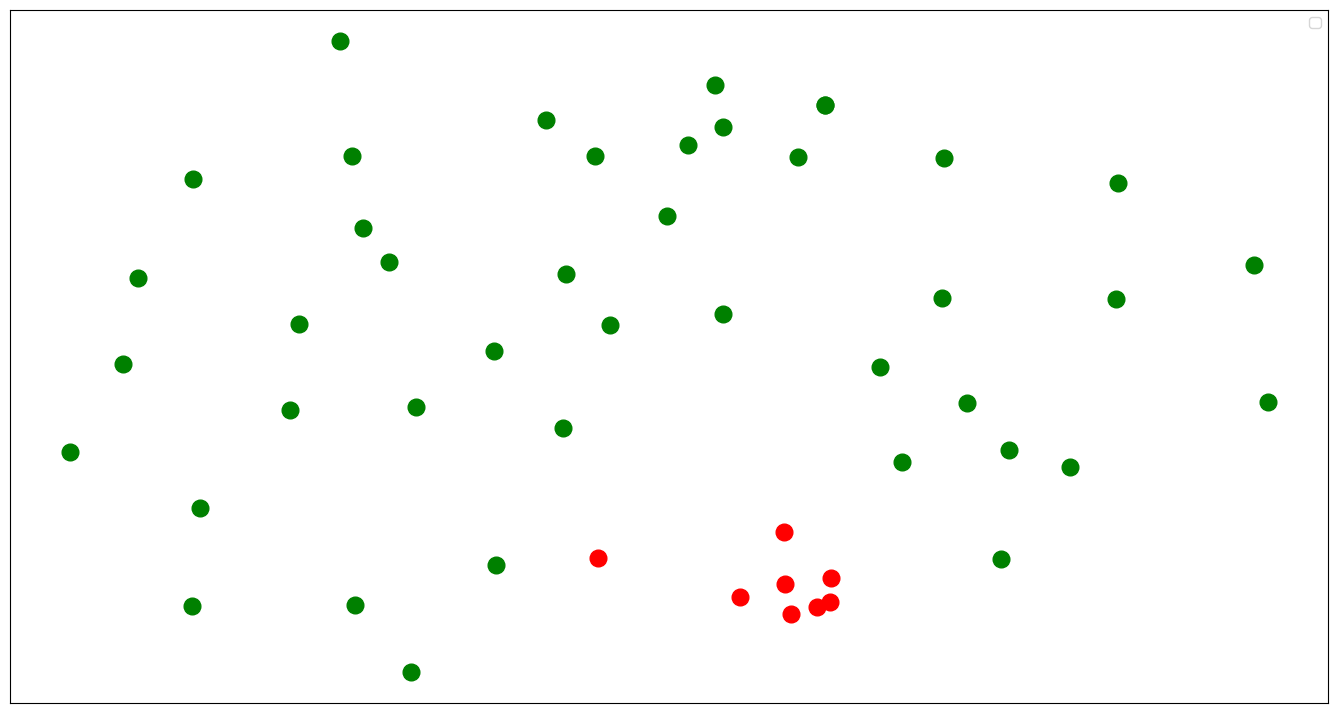

In [164]:
#I couldn't make it work with the np.linalg.svd. So I used MDS instead.

dist = 1 - cosine_similarity(X1)
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist)  
xs, ys = pos[:, 0], pos[:, 1]
df = pd.DataFrame(dict(x=xs, y=ys, label=predicted_labels))
groups = df.groupby('label')

#Plotting

cluster_colors = {0:'g', 1:'r', 2:'b', 3: 'y'}

fig, ax = plt.subplots(figsize=(17, 9)) 
ax.margins(0.05)

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            color=cluster_colors[name]) 
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          
        which='both',      
        bottom=False,      
        top=False,         
        labelbottom=False)
    ax.tick_params(\
        axis= 'y',         
        which='both',      
        left=False,      
        top=False,         
        labelleft=False)
    
ax.legend(numpoints=1)  

